In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#torch.manual_seed(1)#为CPU设置种子用于生成随机数，以使得结果是确定的 

In [2]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

generate some fake data

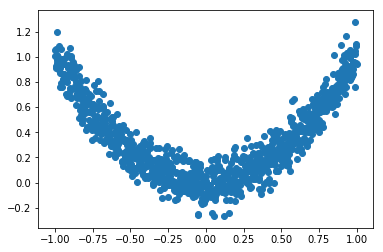

In [3]:
#fake dataset
x = torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

#plot dataset
plt.scatter(x.numpy(),y.numpy())
plt.show()

### put dataset into torch dataset

In [4]:
# torch_dataset = Data.TensorDataset(x,y)
# loader = Data.DataLoader(dataset=torch_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=2,)

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)


### Default network

In [11]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1)
    def forward(self,x):
        x = F.relu(self.hidden(x))# activation function for hidden layer
        x = self.predict(x)
        return x

        

### Different nets

In [14]:
net_SGD      =  Net()
net_Momentum =  Net()
net_RMSprop  =  Net()
net_Adam     =  Net()
nets = [net_SGD,net_Momentum,net_RMSprop,net_Adam]

# net_SGD         = Net()
# net_Momentum    = Net()
# net_RMSprop     = Net()
# net_Adam        = Net()
# nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

### Different optimizers

In [15]:
opt_SGD      = torch.optim.SGD(net_SGD.parameters(),lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
opt_RMSprop  = torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
opt_Adam     = torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))

optimizers = [opt_SGD,opt_Momentum,opt_RMSprop,opt_Adam]
# opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
# opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
# opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
# opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
# optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [9]:
loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]] #record loss

EPOCH:  0
EPOCH:  1
EPOCH:  2
EPOCH:  3
EPOCH:  4
EPOCH:  5
EPOCH:  6
EPOCH:  7
EPOCH:  8
EPOCH:  9
EPOCH:  10
EPOCH:  11


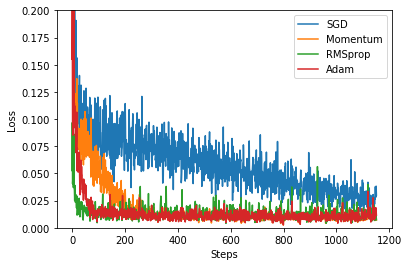

In [13]:
# training
for epoch in range(EPOCH):
    print('EPOCH: ',epoch)
    for step,(b_x,b_y) in enumerate(loader):
        for net, opt,l_his in zip(nets,optimizers,losses_his):
            output = net(b_x)
            loss = loss_func(output,b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data.numpy())


labels = ['SGD','Momentum','RMSprop','Adam']
for i,l_his in enumerate(losses_his):
    plt.plot(l_his,label=labels[i])
    
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))
plt.show()
